# Helixscope Developer Notebook

This notebook explains the metadata and back-end queries required to build the Helixscope project. The project depends on the `helixscope` carto account: [helixscope.carto.com](helixscope.carto.com). In this account we have several shapefiles:

* gadm28_countries : *admin0 level geometries (these may possibly not be needed)*
* good_five_grid   : *a 5x5 degree grid intersected with natural earth landcover polygons, which will be the basis for the choropleth map.*

and several tables:
* master_admin0 : *The admin-0 (country-level) table holding processed data for all helixscope datasets. This will be needed to build the COUNTRY PAGES*
* master_5x5 : *The 5x5 degree gridded data, needed to build the map. This contains a SUBSET of the helixscope data only. - just the data which should be mapped.*

Note that the `master_5x5` and `master_admin0` data tables contain values for `mean`, `min`, `max`, and `std` for almost all data. (The only exceptions are the flood data and agricultural data, which should only have `mean`, and shuld only appear on the country pages - and are only present in the `master_admin0` table.


## JSON resouces

Below are listed some required JSON mappings.


#### Specific warming levels 
```json
{'1.5':'1.5°C warming',
 '2':'2°C warming',
 '4':'4°C warming',
 '6':'6°C warming'}
```

#### possible attributes  in table (column names) and their human readable mapping

These are the attributes which we will want to access to create widgets and maps. We will need a mapping to the names to build up dynamic descriptions of these items.

```json
{'min':'minimum',
'max':'maximum',
'mean':'mean',
'std':'standard deviation'}
```


#### Mapping of climate impact tag to all variables in the master_admin0 (Country pages) table

```json
{'ag': ['Maize_yield_perc_change',
  'Wheat_yield_perc_change',
  'Soybeans_yield_perc_change',
  'Soybeans_Irrigation_avoided_perc_change',
  'Rice_Irrigation_avoided_perc_change',
  'Wheat_Irrigation_avoided_perc_change',
  'Rice_yield_perc_change',
  'Maize_Irrigation_avoided_perc_change'],
 'bd': ['amphibianobiodiversity',
  'birdrealbiodiversity',
  'amphibiarealbiodiversity',
  'reptilerealbiodiversity',
  'reptilenobiodiversity',
  'mammalnobiodiversity',
  'birdnobiodiversity',
  'mammalrealbiodiversity'],
 'cl': ['tx', 'pr', 'ts', 'tn'],
 'eco': ['nbp', 'evap', 'gpp', 'cVeg', 'cSoil'],
 'w': ['time_perc_change_SPI6',
  'perc_change_low_roff',
  'time_perc_change_SRI6',
  'river_floods_ExpDam',
  'river_floods_PopAff',
  'perc_change_roff',
  'time_perc_change_SPI48',
  'time_perc_change_SRI48']}
```

#### Mapping of climate impact tag to all variables in master_5x5 (Map pages) table

Note, for the master_5x5 table there is no 'ag' data.

```json
{
'bd': ['amphibianobiodiversity',
          'birdrealbiodiversity',
          'reptilerealbiodiversity',
          'reptilenobiodiversity',
          'mammalnobiodiversity',
          'birdnobiodiversity',
          'amphibiarealbiodiversity',
          'mammalrealbiodiversity'],
 'cl': ['pr', 'tx', 'ts', 'tn'],
 'eco': ['nbp', 'evap', 'gpp', 'cVeg', 'cSoil'],
 'w': ['time_perc_change_SPI6',
          'perc_change_low_roff',
          'time_perc_change_SRI6',
          'perc_change_roff',
          'time_perc_change_SPI48',
          'time_perc_change_SRI48']
  }

```


#### Variables in master_admin0 table and their short names

`variable` human-readable value as a short name. The value should be exposed in menus and as titles.

```json
{
'Maize_Irrigation_avoided_perc_change':'Maize yield change avoided by irrigation',
'Maize_yield_perc_change':'Maize yield change',
'Rice_Irrigation_avoided_perc_change':'Rice yield change avoided by irrigation',
'Rice_yield_perc_change':'Rice yield change',
'Soybeans_Irrigation_avoided_perc_change':'Soybeans yield change avoided by irrigation',
'Soybeans_yield_perc_change':'Soybeans yield change',
'Wheat_Irrigation_avoided_perc_change':'Wheat yield change avoided by irrigation',
'Wheat_yield_perc_change':'Wheat yield change',
'amphibianobiodiversity':'Amphibian species richness - without movement',
'amphibiarealbiodiversity':'Amphibian species richness',
'birdnobiodiversity':'Bird species richness - without movement',
'birdrealbiodiversity':'Bird species richness',
'evap':'Evapotranspiration',
'cSoil':"Soil carbon content",
'cVeg':'Vegetation biomass',
'gpp':'Gross primary productivity',
'mammalnobiodiversity':'Mammalian species richness remaining - without movement',
'mammalrealbiodiversity':'Mammalian species richness',
'nbp':'Net Biome productivity',
'perc_change_low_roff':'10th percentile runoff production',
'perc_change_roff':'Runoff production',
'pr':'Precipitation',
'reptilenobiodiversity':'Reptile species richness - without movement',
'reptilerealbiodiversity':'Reptile species richness',
'river_floods_ExpDam':'Damage from river flooding',
'river_floods_PopAff': 'Population affected by river flooding',
'time_perc_change_SPI48':'Time change under drought conditions, from SPI48',
'time_perc_change_SPI6':'Time change under drought conditions, from SPI6',
'time_perc_change_SRI48':'Time change under drought conditions from SRI48',
'time_perc_change_SRI6':'Time change under drought conditions from SRI6',
'tn':'Average minimum temperature',
'tx':'Average maximum temperature',
'ts':"Average temperature",
}
```


#### master_admin0 table variables and a long human readable description


```json
{
    'Maize_Irrigation_avoided_perc_change':'Change in maize crop yield avoided by irrigation in percent (%) relative to 1981–2010 levels.',
    'Maize_yield_perc_change':'Change in maize yield in percent (%) relative to 1981–2010 levels.',
    'Rice_Irrigation_avoided_perc_change':'Change in rice crop yield avoided by irrigation in percent (%) relative to 1981–2010 levels.',
    'Rice_yield_perc_change':'Change in rice yield in percent (%) relative to 1981–2010 levels.',
    'Soybeans_Irrigation_avoided_perc_change':'Change in soybean crop yield avoided by irrigation in percent (%) relative to 1981–2010 levels.',
    'Soybeans_yield_perc_change':'Change in soybean yield in percent (%) relative to 1981–2010 levels.',
    'Wheat_Irrigation_avoided_perc_change':'Change in wheat crop yield avoided by irrigation in percent (%) relative to 1981–2010 levels.',
    'Wheat_yield_perc_change':'Change in wheat yield in percent (%) relative to 1981–2010 levels.',
    'amphibianobiodiversity':'Amphibian species richness remaining as a percent (%) relative to 1950–2000 levels, assuming no movement in species from their original location.',
    'amphibiarealbiodiversity':'Amphibian species richness remaining as a percent (%) relative to 1950–2000 levels, including simulations of real movement in species ranges over time.',
    'birdnobiodiversity':'Bird species richness remaining as a percent (%) relative to 1950–2000 levels, assuming no movement in species from their original location.',
    'birdrealbiodiversity':'Bird species richness remaining as a percent (%) relative to 1950–2000 levels, including simulations of real movement in species ranges over time.',
    'cSoil':"Soil carbon content (kg m-2).",
    'cVeg':'Vegetation biomass (kg m-2).',
    'evap':'Evapotranspiration (kg m-2 yr-1).',
    'gpp':'Gross Primary Productivity (gC m-2 yr-1).',
    'mammalnobiodiversity':'Mammalian species richness remaining as a percent (%) relative to 1950–2000 levels, assuming no movement in species from their original location.',
    'mammalrealbiodiversity':'Mammalian species richness remaining as a percent (%) relative to 1950–2000 levels, including simulations of real movement in species ranges over time.',
    'nbp':'Net Biome productivity (gC m-2 yr-1).',
    'perc_change_low_roff':'Relative (%) change in 10th percentile runoff production, derived from daily runoff data.',
    'perc_change_roff':'Relative (%) change in mean runoff production, derived from daily runoff data.',
    'pr':'Precipitation (mm).',
    'reptilenobiodiversity':'Reptile species richness remaining as a percent (%) relative to 1950–2000 levels, assuming no movement in species from their original location.',
    'reptilerealbiodiversity':'Reptile species richness remaining as a percent (%) relative to 1950–2000 levels, including simulations of real movement in species ranges over time.',
    'river_floods_ExpDam':'Direct expected damage per year by river flooding in Euros (in 2010 values) relative to baseline values (average 1976–2005), from multi-model averages based on EC-EARTH r1 to r7.',
    'river_floods_PopAff':'The number of people affected per year by river flooding relative to baseline values (average 1976–2005), from multi-model averages based on EC-EARTH r1 to r7.',
    'time_perc_change_SPI48':'Change in time under drought conditions in percent (%), defined as the sum of months with 48-month Standardised Precipitation Index (SPI48) below the value -1.5, relative to the average over the baseline period of 1981-2010.',
    'time_perc_change_SPI6':'Change in time under drought conditions in percent (%), defined as the sum of months with 6-month Standardised Precipitation Index (SPI6) below the value -1.5, relative to the average over the baseline period of 1981-2010.',
    'time_perc_change_SRI48':'Change in time under drought conditions in percent (%), defined as the sum of months with 48-month Standardised Runoff Index (SRI48) below the value -1.5, relative to the average over the baseline period of 1981-2010.',
    'time_perc_change_SRI6':'Change in time under drought conditions in percent (%), defined as the sum of months with 6-month Standardised Runoff Index (SRI6) below the value -1.5, relative to the average over the baseline period of 1981-2010.',
    'tn':'Annual average minimum temperature (degrees Celsius).',
    'ts':"Annual average temperature (degrees Celsius).",
    'tx':'Annual average maximum temperature (degrees Celsius).',
}
```

#### Dictionary of variables to widget axis labels

The units dictionary is required for plotting widgets, and maps the variable name to the label to put on plot axes.

```json
 {
    'Maize_Irrigation_avoided_perc_change':'Yield change avoided by irrigation (%)',
    'Maize_yield_perc_change':'Yield change (%)',
    'Rice_Irrigation_avoided_perc_change':'Yield change avoided by irrigation (%)',
    'Rice_yield_perc_change':'Yield change (%)',
    'Soybeans_Irrigation_avoided_perc_change':'Yield change avoided by irrigation (%)',
    'Soybeans_yield_perc_change':'Yield change (%)',
    'Wheat_Irrigation_avoided_perc_change':'Yield change avoided by irrigation (%)',
    'Wheat_yield_perc_change':'Yield change (%)',
    'amphibianobiodiversity':'Change in species richness (%)',
    'amphibiarealbiodiversity':'Change in species richness (%)',
    'birdnobiodiversity':'Change in species richness (%)',
    'birdrealbiodiversity':'Change in species richness (%)',
    'cSoil':"Soil carbon content (kg m-2)",
    'cVeg':'Vegetation biomass (kg m-2)',
    'evap':'Evapotranspiration (kg m-2 yr-1)',
    'gpp':'Gross Primary Productivity (gC m-2 yr-1)',
    'mammalnobiodiversity':'Change in species richness (%)',
    'mammalrealbiodiversity':'Change in species richness (%)',
    'nbp':'Net Biome productivity (gC m-2 yr-1)',
    'perc_change_low_roff':'Change in runoff (%)',
    'perc_change_roff':'Change in runoff (%)',
    'pr':'Precipitation (mm)',
    'reptilenobiodiversity':'Change in species richness (%)',
    'reptilerealbiodiversity':'Change in species richness (%)',
    'river_floods_ExpDam':'Spending change on annual river flood damage (by value of Euro in 2010)',
    'river_floods_PopAff':'Change in number people affected annually by river flooding (counts)',
    'time_perc_change_SPI48':'Change in time under long-term drought conditions (%)',
    'time_perc_change_SPI6':'Change in duration of short-term drought (%)',
    'time_perc_change_SRI48':'Change in duration of long-term drought (%)',
    'time_perc_change_SRI6':'Change in duration of short-term drought (%)',
    'tn':'Minimum temperature (°C)',
    'ts':"Mean temperature (°C)",
    'tx':'Maximum temperature (°C)',
}

```

#### Dictionary of variables to units (needed for dynamic sentences)

```json
{
    'Maize_Irrigation_avoided_perc_change':'%',
    'Maize_yield_perc_change':'%',
    'Rice_Irrigation_avoided_perc_change':'%',
    'Rice_yield_perc_change':'%',
    'Soybeans_Irrigation_avoided_perc_change':'%',
    'Soybeans_yield_perc_change':'%',
    'Wheat_Irrigation_avoided_perc_change':'%',
    'Wheat_yield_perc_change':'%',
    'amphibianobiodiversity':'%',
    'amphibiarealbiodiversity':'%',
    'birdnobiodiversity':'%',
    'birdrealbiodiversity':'%',
    'cSoil':"kg m-2",
    'cVeg':'kg m-2',
    'evap':'kg m-2 yr-1',
    'gpp':'gC m-2 yr-1',
    'mammalnobiodiversity':'%',
    'mammalrealbiodiversity':'%',
    'nbp':'gC m-2 yr-1',
    'perc_change_low_roff':'%',
    'perc_change_roff':'%',
    'pr':'mm',
    'reptilenobiodiversity':'%',
    'reptilerealbiodiversity':'%',
    'river_floods_ExpDam':'€ (2010 value)',
    'river_floods_PopAff':'people',
    'time_perc_change_SPI48':'%',
    'time_perc_change_SPI6':'%',
    'time_perc_change_SRI48':'%',
    'time_perc_change_SRI6':'%',
    'tn':'°C',
    'ts':"°C",
    'tx':'°C',
    'swl':'Temperature relative to pre-industrial levels (°C)'
}
```

#### impact_tag and human readable version for menus

```json
{
'bd':'Biodiversity',
'w':'Water',
'eco':'Ecosystem',
'ag':'Agriculture',
'cl':'Climate',
}
```


### Tool-tip widget

The choropleth map will require a pop-up containing some dynamic text, and a widget. The widget is meant to convey the range of model results for a given cell.
It will need to include:

* a title indicating the human readable variable name and SWL info
* values by model
* a box-plot fit to those values
* a dynamic sentence explaining basic info

All the data componenets required to build this tooltip should be found inside this notebook.

![](./pics/tooltip.png)

In [1]:
import folium
import pprint
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
%matplotlib inline

In [8]:
short_name_json = {
'Maize_Irrigation_avoided_perc_change':'Maize yield change avoided by irrigation',
'Maize_yield_perc_change':'Maize yield change',
'Rice_Irrigation_avoided_perc_change':'Rice yield change avoided by irrigation',
'Rice_yield_perc_change':'Rice yield change',
'Soybeans_Irrigation_avoided_perc_change':'Soybeans yield change avoided by irrigation',
'Soybeans_yield_perc_change':'Soybeans yield change',
'Wheat_Irrigation_avoided_perc_change':'Wheat yield change avoided by irrigation',
'Wheat_yield_perc_change':'Wheat yield change',
'amphibianobiodiversity':'Amphibian species richness - without movement',
'amphibiarealbiodiversity':'Amphibian species richness',
'birdnobiodiversity':'Bird species richness - without movement',
'birdrealbiodiversity':'Bird species richness',
'evap':'Evapotranspiration',
'cSoil':"Soil carbon content",
'cVeg':'Vegetation biomass',
'gpp':'Gross primary productivity',
'mammalnobiodiversity':'Mammalian species richness remaining - without movement',
'mammalrealbiodiversity':'Mammalian species richness',
'nbp':'Net Biome productivity',
'perc_change_low_roff':'10th percentile runoff production',
'perc_change_roff':'Runoff production',
'pr':'Precipitation',
'reptilenobiodiversity':'Reptile species richness - without movement',
'reptilerealbiodiversity':'Reptile species richness',
'river_floods_ExpDam':'Damage from river flooding',
'river_floods_PopAff': 'Population affected by river flooding',
'time_perc_change_SPI48':'Time change under drought conditions, from SPI48',
'time_perc_change_SPI6':'Time change under drought conditions, from SPI6',
'time_perc_change_SRI48':'Time change under drought conditions from SRI48',
'time_perc_change_SRI6':'Time change under drought conditions from SRI6',
'tn':'Average monthly minimum temperature',
'tx':'Average monthly maximum temperature',
'ts':'Average monthly temperature',
}



long_name_json = {
    'Maize_Irrigation_avoided_perc_change':'Change in maize crop yield avoided by irrigation in percent (%) relative to 1981–2010 levels.',
    'Maize_yield_perc_change':'Change in maize yield in percent (%) relative to 1981–2010 levels.',
    'Rice_Irrigation_avoided_perc_change':'Change in rice crop yield avoided by irrigation in percent (%) relative to 1981–2010 levels.',
    'Rice_yield_perc_change':'Change in rice yield in percent (%) relative to 1981–2010 levels.',
    'Soybeans_Irrigation_avoided_perc_change':'Change in soybean crop yield avoided by irrigation in percent (%) relative to 1981–2010 levels.',
    'Soybeans_yield_perc_change':'Change in soybean yield in percent (%) relative to 1981–2010 levels.',
    'Wheat_Irrigation_avoided_perc_change':'Change in wheat crop yield avoided by irrigation in percent (%) relative to 1981–2010 levels.',
    'Wheat_yield_perc_change':'Change in wheat yield in percent (%) relative to 1981–2010 levels.',
    'amphibianobiodiversity':'Amphibian species richness remaining as a percent (%) relative to 1950–2000 levels, assuming no movement in species from their original location.',
    'amphibiarealbiodiversity':'Amphibian species richness remaining as a percent (%) relative to 1950–2000 levels, including simulations of real movement in species ranges over time.',
    'birdnobiodiversity':'Bird species richness remaining as a percent (%) relative to 1950–2000 levels, assuming no movement in species from their original location.',
    'birdrealbiodiversity':'Bird species richness remaining as a percent (%) relative to 1950–2000 levels, including simulations of real movement in species ranges over time.',
    'cSoil':"Soil carbon content (kg m-2).",
    'cVeg':'Vegetation biomass (kg m-2).',
    'evap':'Evapotranspiration (kg m-2 yr-1).',
    'gpp':'Gross Primary Productivity (gC m-2 yr-1).',
    'mammalnobiodiversity':'Mammalian species richness remaining as a percent (%) relative to 1950–2000 levels, assuming no movement in species from their original location.',
    'mammalrealbiodiversity':'Mammalian species richness remaining as a percent (%) relative to 1950–2000 levels, including simulations of real movement in species ranges over time.',
    'nbp':'Net Biome productivity (gC m-2 yr-1).',
    'perc_change_low_roff':'Relative (%) change in 10th percentile runoff production, derived from daily runoff data.',
    'perc_change_roff':'Relative (%) change in mean runoff production, derived from daily runoff data.',
    'pr':'Precipitation (mm).',
    'reptilenobiodiversity':'Reptile species richness remaining as a percent (%) relative to 1950–2000 levels, assuming no movement in species from their original location.',
    'reptilerealbiodiversity':'Reptile species richness remaining as a percent (%) relative to 1950–2000 levels, including simulations of real movement in species ranges over time.',
    'river_floods_ExpDam':'Direct expected damage per year by river flooding in Euros (in 2010 values) relative to baseline values (average 1976–2005), from multi-model averages based on EC-EARTH r1 to r7.',
    'river_floods_PopAff':'The number of people affected per year by river flooding relative to baseline values (average 1976–2005), from multi-model averages based on EC-EARTH r1 to r7.',
    'time_perc_change_SPI48':'Change in time under drought conditions in percent (%), defined as the sum of months with 48-month Standardised Precipitation Index (SPI48) below the value -1.5, relative to the average over the baseline period of 1981-2010.',
    'time_perc_change_SPI6':'Change in time under drought conditions in percent (%), defined as the sum of months with 6-month Standardised Precipitation Index (SPI6) below the value -1.5, relative to the average over the baseline period of 1981-2010.',
    'time_perc_change_SRI48':'Change in time under drought conditions in percent (%), defined as the sum of months with 48-month Standardised Runoff Index (SRI48) below the value -1.5, relative to the average over the baseline period of 1981-2010.',
    'time_perc_change_SRI6':'Change in time under drought conditions in percent (%), defined as the sum of months with 6-month Standardised Runoff Index (SRI6) below the value -1.5, relative to the average over the baseline period of 1981-2010.',
    'tn':'Annual average minimum temperature (degrees Celsius).',
    'ts':"Annual average temperature (degrees Celsius).",
    'tx':'Annual average maximum temperature (degrees Celsius).',
}

swl_json = {'1.5':'1.5°C warming',
 '2':'2°C warming',
 '4':'4°C warming',
 '6':'6°C warming'}

attribute_jsons = {'min':'minimum',
                   'max':'maximum',
                   'mean':'mean',
                   'std':'standard deviation'}

fig_labels_json =  {
    'Maize_Irrigation_avoided_perc_change':'Yield change avoided by irrigation (%)',
    'Maize_yield_perc_change':'Yield change (%)',
    'Rice_Irrigation_avoided_perc_change':'Yield change avoided by irrigation (%)',
    'Rice_yield_perc_change':'Yield change (%)',
    'Soybeans_Irrigation_avoided_perc_change':'Yield change avoided by irrigation (%)',
    'Soybeans_yield_perc_change':'Yield change (%)',
    'Wheat_Irrigation_avoided_perc_change':'Yield change avoided by irrigation (%)',
    'Wheat_yield_perc_change':'Yield change (%)',
    'amphibianobiodiversity':'Change in species richness (%)',
    'amphibiarealbiodiversity':'Change in species richness (%)',
    'birdnobiodiversity':'Change in species richness (%)',
    'birdrealbiodiversity':'Change in species richness (%)',
    'cSoil':"Soil carbon content (kg m-2)",
    'cVeg':'Vegetation biomass (kg m-2)',
    'evap':'Evapotranspiration (kg m-2 yr-1)',
    'gpp':'Gross Primary Productivity (gC m-2 yr-1)',
    'mammalnobiodiversity':'Change in species richness (%)',
    'mammalrealbiodiversity':'Change in species richness (%)',
    'nbp':'Net Biome productivity (gC m-2 yr-1)',
    'perc_change_low_roff':'Change in runoff (%)',
    'perc_change_roff':'Change in runoff (%)',
    'pr':'Precipitation (mm)',
    'reptilenobiodiversity':'Change in species richness (%)',
    'reptilerealbiodiversity':'Change in species richness (%)',
    'river_floods_ExpDam':'Spending change on annual river flood damage (by value of Euro in 2010)',
    'river_floods_PopAff':'Change in number people affected annually by river flooding (counts)',
    'time_perc_change_SPI48':'Change in time under long-term drought conditions (%)',
    'time_perc_change_SPI6':'Change in duration of short-term drought (%)',
    'time_perc_change_SRI48':'Change in duration of long-term drought (%)',
    'time_perc_change_SRI6':'Change in duration of short-term drought (%)',
    'tn':'Minimum temperature (°C)',
    'ts':'Mean temperature (°C)',
    'tx':'Maximum temperature (°C)',
    'swl':'Temperature relative to pre-industrial levels (°C)',
}

var_units_json =  {
    'Maize_Irrigation_avoided_perc_change':'%',
    'Maize_yield_perc_change':'%',
    'Rice_Irrigation_avoided_perc_change':'%',
    'Rice_yield_perc_change':'%',
    'Soybeans_Irrigation_avoided_perc_change':'%',
    'Soybeans_yield_perc_change':'%',
    'Wheat_Irrigation_avoided_perc_change':'%',
    'Wheat_yield_perc_change':'%',
    'amphibianobiodiversity':'%',
    'amphibiarealbiodiversity':'%',
    'birdnobiodiversity':'%',
    'birdrealbiodiversity':'%',
    'cSoil':"kg m-2",
    'cVeg':'kg m-2',
    'evap':'kg m-2 yr-1',
    'gpp':'gC m-2 yr-1',
    'mammalnobiodiversity':'%',
    'mammalrealbiodiversity':'%',
    'nbp':'gC m-2 yr-1',
    'perc_change_low_roff':'%',
    'perc_change_roff':'%',
    'pr':'mm',
    'reptilenobiodiversity':'%',
    'reptilerealbiodiversity':'%',
    'river_floods_ExpDam':'€ (2010 value)',
    'river_floods_PopAff':'people',
    'time_perc_change_SPI48':'%',
    'time_perc_change_SPI6':'%',
    'time_perc_change_SRI48':'%',
    'time_perc_change_SRI6':'%',
    'tn':'°C',
    'ts':'°C',
    'tx':'°C',
}

### Generate Choropleths at Admin-0 
** DEPRECIATED**

Originally, the design intended to use admin-0 level choropleths based. This is no longer the idea, BUT incase you need to create them, you can do so using the carto Maps API with queries structured as below:

In [5]:
table_name = 'master_admin0'
var_name = 'tx'
swl_var = '2'
shapefile = 'gadm28_countries'
attribute = 'mean'

query=("WITH data as (SELECT * FROM {0} "
         "Where variable like '{1}' "
         "AND swl_info = '{2}') "
         "SELECT {3}.iso, {3}.the_geom_webmercator, "
         "{3}.cartodb_id, {4} from data inner join {3} "
         "on data.iso={3}.iso".format(
             table_name, var_name, swl_var, shapefile, attribute))

print(query)

style = """#layer {polygon-fill: ramp([mean], colorbrewer(RdYlBu), equal(10));
                   polygon-opacity: 0.9;}"""

account = 'helixscope'
urlCarto = 'https://'+account+'.carto.com/api/v1/map'
body = {
    "layers": [{
        "type": "cartodb",
        "options": {
            "sql": query,
            "cartocss":style,
            "cartocss_version": "2.1.1"
        }
    }]
}

r = requests.post(urlCarto, data=json.dumps(body), headers={'content-type': 'application/json; charset=UTF-8'})
print(r.url)
#pprint.pprint(r.json())

tileUrl = 'https://'+account+'.carto.com/api/v1/map/' + r.json()['layergroupid'] + '/{z}/{x}/{y}.png32';

map_osm2 = folium.Map(location=[45.5236, 0.6750], zoom_start=3, tiles="CartoDB", attr='random')
folium.TileLayer(
    tiles=tileUrl,
    attr='text',
    name='text',
    overlay=True
).add_to(map_osm2)

#map_osm2

WITH data as (SELECT * FROM master_admin0 Where variable like 'tx' AND swl_info = '2') SELECT gadm28_countries.iso, gadm28_countries.the_geom_webmercator, gadm28_countries.cartodb_id, mean from data inner join gadm28_countries on data.iso=gadm28_countries.iso
https://helixscope.carto.com/api/v1/map


![](./pics/eg0.png)

### 5° x 5° grid choropleth


The choropleth maps we will need to generate should all be based on the following query:

Regarding appearance of the map: speak to Juan Carlos to identify the colour palette required.



Note that for the map only a subset of the possible variables should be selectable, they are as follows:


```
['amphibianobiodiversity',
'amphibiarealbiodiversity',
'birdnobiodiversity',
'birdrealbiodiversity',
'cSoil',
'cVeg',
'evap',
'gpp',
'mammalnobiodiversity',
'mammalrealbiodiversity',
'nbp',
'perc_change_low_roff',
'perc_change_roff',
'pr',
'reptilenobiodiversity',
'reptilerealbiodiversity',
'time_perc_change_SPI48',
'time_perc_change_SPI6',
'time_perc_change_SRI48',
'time_perc_change_SRI6',
'tn',
'ts',
'tx']
```


In [7]:
r.json()

{'cdn_url': {'http': 'ashbu.cartocdn.com',
  'https': 'cartocdn-ashbu.global.ssl.fastly.net',
  'templates': {'http': {'subdomains': ['0', '1', '2', '3'],
    'url': 'http://{s}.ashbu.cartocdn.com'},
   'https': {'subdomains': ['a', 'b', 'c', 'd'],
    'url': 'https://cartocdn-ashbu_{s}.global.ssl.fastly.net'}}},
 'last_updated': '2017-10-11T14:32:45.539Z',
 'layergroupid': 'bb26d8e9a839ac09ea5ab477e89d85d9:1507732365539',
 'metadata': {'analyses': [],
  'dataviews': {},
  'layers': [{'id': 'layer0',
    'meta': {'cartocss': '#layer {polygon-fill: #a50026;[ mean > -35.914 ] {polygon-fill: #d73027;}[ mean > -26.688 ] {polygon-fill: #f46d43;}[ mean > -17.462 ] {polygon-fill: #fdae61;}[ mean > -8.236 ] {polygon-fill: #fee090;}[ mean > 0.99 ] {polygon-fill: #e0f3f8;}[ mean > 10.216 ] {polygon-fill: #abd9e9;}[ mean > 19.442 ] {polygon-fill: #74add1;}[ mean > 28.668 ] {polygon-fill: #4575b4;}[ mean > 37.894 ] {polygon-fill: #313695;}\n                   polygon-opacity: 0.9;}',
     'cartocs

In [3]:
table_name = 'master_5x5'
var_name = 'tx'
swl_var = '4'
shapefile = 'five_grid_shapefiles'
attribute = 'mean'   # Possible attributes here are 'max', 'min','mean','std'

query=("WITH data as (SELECT shape_id, AVG({4}) as {4} " 
         "FROM {0} "
         "Where variable like '{1}' "
         "AND swl_info = '{2}' " 
         "GROUP BY shape_id) "
         "SELECT {3}.id_val, {3}.the_geom_webmercator, "
         "{3}.cartodb_id, {4} from data inner join {3} "
         "on data.shape_id={3}.id_val".format(
             table_name, var_name, swl_var, shapefile, attribute))
print(query)


# style_query = ("#layer {{polygon-fill: ramp([mean], "  #<- mean should be the attribute variable
#                "colorbrewer(RdYlBu), equal(10)); "
#                "polygon-opacity: 0.9;} ::outline { "
#                "line-color: #000000; line-width: 0; line-opacity: 0;}}")

style_query = ("#layer {polygon-fill: ramp([mean], colorbrewer(RdYlBu), equal(10)); polygon-opacity: 0.9;"
               " line-color: #000000; line-width: 0; line-opacity: 0;}"
              )

# Note the above line has a dynamic variable in python. If you want to see how it looks its like the below:
# style = """#layer {polygon-fill: ramp([std], colorbrewer(RdYlBu), equal(10));
#                    polygon-opacity: 0.9;}"""

style = style_query

print('\n',style_query)


account = 'helixscope'
urlCarto = 'https://'+account+'.carto.com/api/v1/map'
body = {
    "layers": [{
        "type": "cartodb",
        "options": {
            "sql": query,
            "cartocss":style,
            "cartocss_version": "2.1.1"
        }
    }]
}

r = requests.post(urlCarto, data=json.dumps(body), headers={'content-type': 'application/json; charset=UTF-8'})
print(r.url)
#pprint.pprint(r.json())

tileUrl = 'https://'+account+'.carto.com/api/v1/map/' + r.json()['layergroupid'] + '/{z}/{x}/{y}.png32';

map_osm_grid = folium.Map(location=[45.5236, 0.6750], zoom_start=3, tiles="CartoDB", attr='random')
folium.TileLayer(
    tiles=tileUrl,
    attr='text',
    name='text',
    overlay=True
).add_to(map_osm_grid)

#map_osm_grid

WITH data as (SELECT shape_id, AVG(mean) as mean FROM master_5x5 Where variable like 'tx' AND swl_info = '4' GROUP BY shape_id) SELECT five_grid_shapefiles.id_val, five_grid_shapefiles.the_geom_webmercator, five_grid_shapefiles.cartodb_id, mean from data inner join five_grid_shapefiles on data.shape_id=five_grid_shapefiles.id_val

 #layer {polygon-fill: ramp([mean], colorbrewer(RdYlBu), equal(10)); polygon-opacity: 0.9; line-color: #000000; line-width: 0; line-opacity: 0;}
https://helixscope.carto.com/api/v1/map


![](./pics/eg_grid.png)

![](./pics/eg_admin0.png)

## Create a box-plot and dynamic sentences on click in the map

When the map is clicked, all avaiable model values for the `shape_id` associated with the click should be returned in order to build the pop-up widget. Note, the `shape_id` is the unique index value associated with the shape on the map, and it is a column in the `master_5x5` table.

In [4]:
table_name = 'master_5x5'
var_name = 'ts'#'mammalrealbiodiversity'
swl_var = '2'
shapefile = 'good_five_grid'
attribute = 'min'   # Possible attributes here are 'max', 'min','mean','std'
shape_id = 1  # unique id codes of all individual shapes in 5x5 shapefile

query=("SELECT model_short_name, model_long_name, run, {0} as value "
       "FROM {1} "
       "WHERE swl_info = {2}"
       "AND variable = '{3}'"
       "AND shape_id = {4}"
       "".format(attribute, table_name, swl_var, var_name, shape_id))

print(query,'\n')

account = 'helixscope'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": query}
r = requests.get(urlCarto, params=sql)
print(r.url,'\n')
pprint.pprint(r.json())

SELECT model_short_name, model_long_name, run, min as value FROM master_5x5 WHERE swl_info = 2AND variable = 'ts'AND shape_id = 1 

https://helixscope.carto.com/api/v2/sql?q=SELECT+model_short_name%2C+model_long_name%2C+run%2C+min+as+value+FROM+master_5x5+WHERE+swl_info+%3D+2AND+variable+%3D+%27ts%27AND+shape_id+%3D+1 

{'fields': {'model_long_name': {'type': 'string'},
            'model_short_name': {'type': 'string'},
            'run': {'type': 'number'},
            'value': {'type': 'number'}},
 'rows': [{'model_long_name': 'ECEARTH-R3',
           'model_short_name': 'ECEARTH',
           'run': 3,
           'value': 28.63},
          {'model_long_name': 'HADGEM3-R1',
           'model_short_name': 'HADGEM3',
           'run': 1,
           'value': 28.73},
          {'model_long_name': 'HADGEM3-R6',
           'model_short_name': 'HADGEM3',
           'run': 6,
           'value': 28.6},
          {'model_long_name': 'ECEARTH-R4',
           'model_short_name': 'ECEARTH',
    

The values should be shown in a boxplot, as demonstrated below. 
The values for the boxplot will depend on what attribute is selected for a given variable (e.g. `mean` for variable `tx`).

The title of the plot and sentence that should accompany it should be dynamically generated using the json objects, as shown below.

The units of the plot (axis labels) should also be dynamically generated using the query paramaters and the previously listed json dictionaries (as shown below).

Note, the plot has two components to it:

1. A boxplot: You will need to calculate with a plotting libarary based on the returned values.

2. A scatter plot overplotted on the boxplot: The scatter-plot should have colored categories, where the categories are colored by the `model_short_name` and a ledgend should be below the plot showing that information. On hover, the individual scatter elements should show the `model_long_name`.

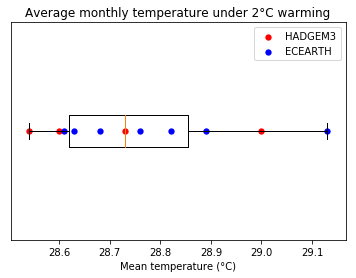

Each point represents a model run. Together, they represent the range of possible futures for the minimum of average monthly temperature in the area you have selected, in a world which has experienced 2°C warming relative to pre-industrial levels. The map shows the average values of the model projections (28.76 °C).


In [10]:
# Example of constructing the boxplot (which you can re-factor to your language / library of choice)
d = r.json()

data = []
individual_point_labels = []
categories = []
for row in d.get('rows'):
    data.append(row.get('value', None))
    individual_point_labels.append(row.get('model_long_name'))
    categories.append(row.get('model_short_name'))

data = np.array(data)
categories = np.array(categories)
individual_point_labels = np.array(individual_point_labels)

unique_categories = set(categories) # get unique categories which will be colored differently
colors = ['red','blue','green','orange']
color_setter = {} 
for n, unique in enumerate(unique_categories):
    color_setter[unique] = colors[n]


# Dynamic text required for the pop-up
popup_title = ("{0} under {1}".format(short_name_json[var_name] ,swl_json[swl_var]))

dynamic_sentence=("Each point represents a model run. Together, they represent "
                  "the range of possible futures for the {0} of {1} in the area "
                  "you have selected, in a world which has experienced {2} "
                  "relative to pre-industrial levels. "
                  "The map shows the average values of the model "
                  "projections ({3:5.2f} {4})."
                  "".format(attribute_jsons[attribute], short_name_json[var_name].lower(),
                            swl_json[swl_var], np.mean(data), var_units_json[var_name]))
    
    
# --- PLOTING DEMO ----
plt.boxplot(data, 0, '', 0 )
for unique in unique_categories:
    tmp_data = [dat for dat, category in zip(data, categories) if category == unique]
    plt.scatter(tmp_data,
                [1]*len(tmp_data), c=color_setter[unique],
                marker='o', lw=0, s=40.0, label=unique)
plt.yticks([])
plt.title(popup_title)
plt.xlabel(fig_labels_json[var_name])
plt.legend(loc=0, scatterpoints = 1)
plt.show()
print(dynamic_sentence)

## Country Pages Widgets

Data at the country level exists in the `master_admin0` table. On the country pages we will need to create the following widgets:


## CROP DATA WIDGETS


### Yield change relative to 1981–2010 baseline

A widget to show how crop yields are projected to change with different warming levels.
You will need to pull back all of the variables for a given `iso` that have a `variable` that matches the pattern of  `*_yield_*`. You will then need to parse these data, so that you can calculate for each variable/SWL category a 50th percentile (i.e. MEDIAN) and an IQR (inter-quartile range - diffrence between 75th and 25th percentile values) (e.g. [here](https://www.npmjs.com/browse/keyword/percentile) is a node package that can help you calculate those stats).
We will plot the median, with the IQR as an error range, as this will show the uncertainty across the model projections.

Note the values are calculated as a change relative to yields from 1981–2010, which is why they are negative/positive values.

The user should be able to TOGGLE ON/OFF different `variables`.

**NOTE**: * Not all countries have data, and some have crop data but not data for every crop. Therefore we will need to populate the widget dynamically according with what was returned from the Carto SQL query.*

In [11]:
iso = 'ESP' 

query=("SELECT mean as value, swl_info as swl, variable " 
       "FROM master_admin0 "
       "WHERE variable like '%yield%' "
       "AND iso = '{0}'"
       "AND swl_info < 6"
       "ORDER BY swl"
       "".format(iso))

print(query,'\n')

account = 'helixscope'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": query}
r = requests.get(urlCarto, params=sql)
print(r.url,'\n')

pprint.pprint(r.json())

SELECT mean as value, swl_info as swl, variable FROM master_admin0 WHERE variable like '%yield%' AND iso = 'ESP'AND swl_info < 6ORDER BY swl 

https://helixscope.carto.com/api/v2/sql?q=SELECT+mean+as+value%2C+swl_info+as+swl%2C+variable+FROM+master_admin0+WHERE+variable+like+%27%25yield%25%27+AND+iso+%3D+%27ESP%27AND+swl_info+%3C+6ORDER+BY+swl 

{'fields': {'swl': {'type': 'number'},
            'value': {'type': 'number'},
            'variable': {'type': 'string'}},
 'rows': [{'swl': 1.5, 'value': -3.84, 'variable': 'Wheat_yield_perc_change'},
          {'swl': 1.5, 'value': 3.27, 'variable': 'Rice_yield_perc_change'},
          {'swl': 1.5, 'value': -3.91, 'variable': 'Wheat_yield_perc_change'},
          {'swl': 1.5, 'value': -6.27, 'variable': 'Wheat_yield_perc_change'},
          {'swl': 1.5, 'value': 2.83, 'variable': 'Rice_yield_perc_change'},
          {'swl': 1.5, 'value': 3.74, 'variable': 'Rice_yield_perc_change'},
          {'swl': 1.5, 'value': -6.95, 'variable': 'Maize_y

In [12]:
# The below python code simply parses the json into an object where I can access the median and IQR
# convieniently by variable name and SWL

crop_data = r.json()

tmp_variable = []
tmp_swl = []
for row in crop_data.get('rows'):
    tmp_variable.append(row.get('variable'))
    tmp_swl.append(row.get('swl'))
    
unique_variables = set(tmp_variable)
unique_swl = set(tmp_swl)

def give_median_and_IQR(a):
    """from an array a, calculate the median and IQR of the values and return them as a tuple"""
    return(np.median(a), np.percentile(tmp_array, 75) - np.percentile(tmp_array, 25)) 

crop_d ={}
tmp_variable = np.array(tmp_variable)

for var in set(tmp_variable):
    tmp_d = {}
    for swl in set(tmp_swl):
        tmp_array = []
        for row in crop_data.get('rows'):
            if row.get('swl') == swl and row.get('variable') == var:
                tmp_array.append(row.get('value'))
        tmp_d[swl] = np.array(give_median_and_IQR(tmp_array))
    crop_d[var] = tmp_d

pprint.pprint(crop_d)

{'Maize_yield_perc_change': {1.5: array([-6.95,  0.96]),
                             2: array([-10.12 ,   1.215]),
                             4: array([-21.905,   1.865])},
 'Rice_yield_perc_change': {1.5: array([ 3.51 ,  0.405]),
                            2: array([ 5.47,  0.55]),
                            4: array([ 10.475 ,   0.6075])},
 'Soybeans_yield_perc_change': {1.5: array([ 0.26,  2.04]),
                                2: array([ 1.77,  2.13]),
                                4: array([ 4.57,  2.24])},
 'Wheat_yield_perc_change': {1.5: array([-3.91,  1.49]),
                             2: array([-5.84,  1.44]),
                             4: array([-13.49  ,   2.1675])}}


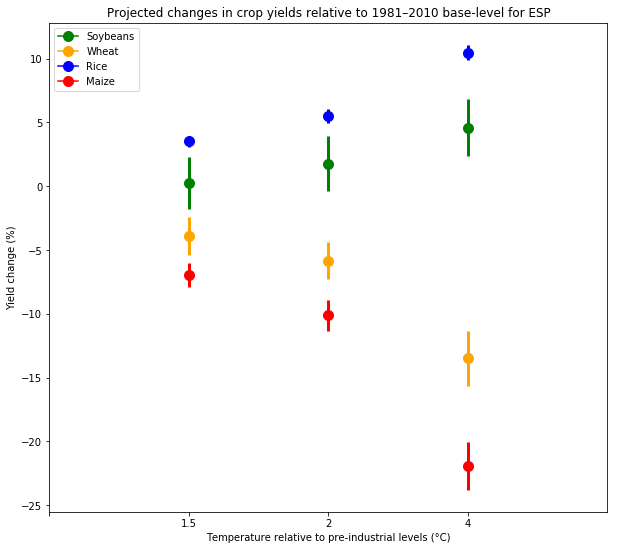

In [13]:
plot_colors = {'Maize_yield_perc_change': 'red',
               'Rice_yield_perc_change':  'blue',
               'Soybeans_yield_perc_change': 'green',
               'Wheat_yield_perc_change': 'orange'}

legend_labels = {'Maize_yield_perc_change': 'Maize',
               'Rice_yield_perc_change':  'Rice',
               'Soybeans_yield_perc_change': 'Soybeans',
               'Wheat_yield_perc_change': 'Wheat'}

plt.figure(figsize=(10,9))
for key in crop_d:
    position = 0
    for swl_key in [1.5, 2, 4]:
        position += 1
        if swl_key == 1.5:
            legend_label = legend_labels[key]
        else:
            legend_label = None
        plt.plot(position, crop_d[key][swl_key][0], marker='o', ms=10, color=plot_colors[key],
                 label=legend_label)
        plt.vlines(position,
                   crop_d[key][swl_key][0] - crop_d[key][swl_key][1],
                   crop_d[key][swl_key][0] + crop_d[key][swl_key][1],
                   lw=3, colors=plot_colors[key]
                  )

    
plt.xlim([0,4])
plt.xticks(range(4),['','1.5','2','4'])
plt.legend(loc=2, scatterpoints = 1)
plt.title('Projected changes in crop yields relative to 1981–2010 base-level for ' + iso)
plt.ylabel(fig_labels_json[key])
plt.xlabel(fig_labels_json['swl'])
plt.show()

#### Metadata to show via an 'i' info button

In many cases these plots will need to show metadata to describe the models and institutes that produced the dataset. We will need to get these dynamically also. 

In [14]:
# We will also need metadata to support the crop plots.

metadata_query=("SELECT model_short_name, institution " 
                   "FROM master_admin0 "
                   "WHERE variable like '%yield%' "
                   "AND iso = '{0}'"
                   "AND swl_info < 6"
                   "GROUP BY model_short_name, institution"
                   "".format(iso))

print(metadata_query,'\n')

account = 'helixscope'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": metadata_query}
r_meta = requests.get(urlCarto, params=sql)
print(r_meta.url,'\n')

pprint.pprint(r_meta.json())

SELECT model_short_name, institution FROM master_admin0 WHERE variable like '%yield%' AND iso = 'ESP'AND swl_info < 6GROUP BY model_short_name, institution 

https://helixscope.carto.com/api/v2/sql?q=SELECT+model_short_name%2C+institution+FROM+master_admin0+WHERE+variable+like+%27%25yield%25%27+AND+iso+%3D+%27ESP%27AND+swl_info+%3C+6GROUP+BY+model_short_name%2C+institution 

{'fields': {'institution': {'type': 'string'},
            'model_short_name': {'type': 'string'}},
 'rows': [{'institution': 'Tyndall Centre for Climate Change Research, '
                          'University of East Anglia',
           'model_short_name': 'ECEARTH'},
          {'institution': 'Tyndall Centre for Climate Change Research, '
                          'University of East Anglia',
           'model_short_name': 'HADGEM3'}],
 'time': 0.073,
 'total_rows': 2}


In [15]:
institutes = []
models = []
crop_metadata = r_meta.json()
for row in crop_metadata.get('rows'):
    institutes.append(row.get('institution'))
    models.append(row.get('model_short_name'))
    
#print(set(institutes))
#print(set(models))


dynamic_metadata_sentence = ("These data were created using the {0} models of "
                             "the {1}. "
                             "All yield values are relative to average yields over a baseline "
                             "period of 1981–2010."
                             "".format(
                             ', '.join(list(set(models))),', '.join(list(set(institutes)))))

print(dynamic_metadata_sentence)

These data were created using the HADGEM3, ECEARTH models of the Tyndall Centre for Climate Change Research, University of East Anglia. All yield values are relative to average yields over a baseline period of 1981–2010.


### Yield change avoided by irrigation strategies

The following widget shows how much yield change was avoided under different warming scenarios as a percent relative to 1981–2010 base levels by applying irrigiation stategies.

It is essentially the same thing as the previous figure, except with some label changes.

In [16]:
iso = 'ESP' 

query=("SELECT mean as value, swl_info as swl, variable " 
       "FROM master_admin0 "
       "WHERE variable like '%Irrigation%' "
       "AND iso = '{0}'"
       "AND swl_info < 6"
       "ORDER BY swl"
       "".format(iso))

print(query,'\n')

account = 'helixscope'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": query}
r = requests.get(urlCarto, params=sql)
print(r.url,'\n')

pprint.pprint(r.json())

SELECT mean as value, swl_info as swl, variable FROM master_admin0 WHERE variable like '%Irrigation%' AND iso = 'ESP'AND swl_info < 6ORDER BY swl 

https://helixscope.carto.com/api/v2/sql?q=SELECT+mean+as+value%2C+swl_info+as+swl%2C+variable+FROM+master_admin0+WHERE+variable+like+%27%25Irrigation%25%27+AND+iso+%3D+%27ESP%27AND+swl_info+%3C+6ORDER+BY+swl 

{'fields': {'swl': {'type': 'number'},
            'value': {'type': 'number'},
            'variable': {'type': 'string'}},
 'rows': [{'swl': 1.5,
           'value': 0,
           'variable': 'Rice_Irrigation_avoided_perc_change'},
          {'swl': 1.5,
           'value': 0.6,
           'variable': 'Wheat_Irrigation_avoided_perc_change'},
          {'swl': 1.5,
           'value': 0.4,
           'variable': 'Maize_Irrigation_avoided_perc_change'},
          {'swl': 1.5,
           'value': 1.01,
           'variable': 'Soybeans_Irrigation_avoided_perc_change'},
          {'swl': 1.5,
           'value': 1.13,
           'variabl

In [17]:
# The below python code again simply parses the json into an object where I can access the median and IQR
# convieniently by variable name and SWL

crop_data = r.json()

tmp_variable = []
tmp_swl = []
for row in crop_data.get('rows'):
    tmp_variable.append(row.get('variable'))
    tmp_swl.append(row.get('swl'))
    
unique_variables = set(tmp_variable)
unique_swl = set(tmp_swl)

def give_median_and_IQR(a):
    """from an array a, calculate the median and IQR of the values and return them as a tuple"""
    return(np.median(a), np.percentile(tmp_array, 75) - np.percentile(tmp_array, 25)) 

crop_d ={}
tmp_variable = np.array(tmp_variable)

for var in set(tmp_variable):
    tmp_d = {}
    for swl in set(tmp_swl):
        tmp_array = []
        for row in crop_data.get('rows'):
            if row.get('swl') == swl and row.get('variable') == var:
                tmp_array.append(row.get('value'))
        tmp_d[swl] = np.array(give_median_and_IQR(tmp_array))
    crop_d[var] = tmp_d

pprint.pprint(crop_d)

{'Maize_Irrigation_avoided_perc_change': {1.5: array([ 0.4  ,  0.195]),
                                          2: array([ 0.49 ,  0.185]),
                                          4: array([ 0.74  ,  0.1925])},
 'Rice_Irrigation_avoided_perc_change': {1.5: array([ 0.01,  0.  ]),
                                         2: array([ 0.01,  0.  ]),
                                         4: array([ 0.02  ,  0.0075])},
 'Soybeans_Irrigation_avoided_perc_change': {1.5: array([ 1.02 ,  0.495]),
                                             2: array([ 1.12,  0.53]),
                                             4: array([ 2.225 ,  0.4975])},
 'Wheat_Irrigation_avoided_perc_change': {1.5: array([ 0.74,  0.37]),
                                          2: array([ 0.84 ,  0.335]),
                                          4: array([ 1.325,  0.34 ])}}


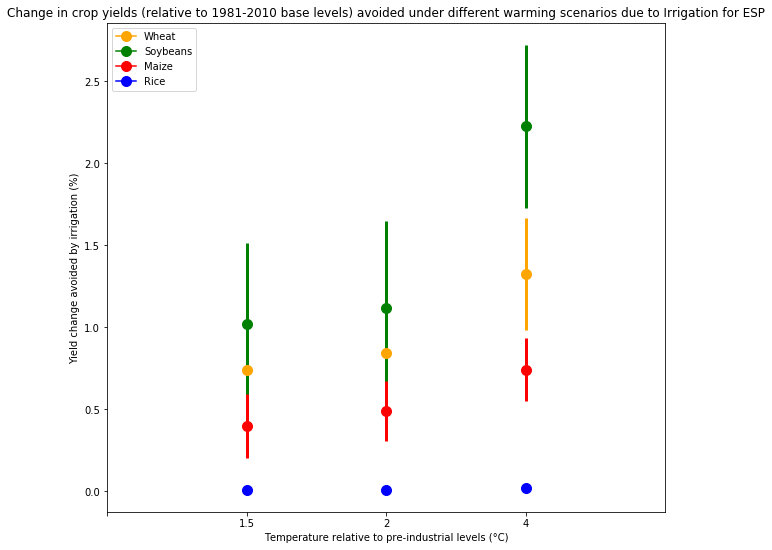

In [18]:
plot_colors = {'Maize_Irrigation_avoided_perc_change': 'red',
               'Rice_Irrigation_avoided_perc_change':  'blue',
               'Soybeans_Irrigation_avoided_perc_change': 'green',
               'Wheat_Irrigation_avoided_perc_change': 'orange'}

legend_labels = {'Maize_Irrigation_avoided_perc_change': 'Maize',
               'Rice_Irrigation_avoided_perc_change':  'Rice',
               'Soybeans_Irrigation_avoided_perc_change': 'Soybeans',
               'Wheat_Irrigation_avoided_perc_change': 'Wheat'}

plt.figure(figsize=(10,9))
for key in crop_d:
    position = 0
    for swl_key in [1.5, 2, 4]:
        position += 1
        if swl_key == 1.5:
            legend_label = legend_labels[key]
        else:
            legend_label = None
        plt.plot(position, crop_d[key][swl_key][0], marker='o', ms=10, color=plot_colors[key],
                 label=legend_label)
        plt.vlines(position,
                   crop_d[key][swl_key][0] - crop_d[key][swl_key][1],
                   crop_d[key][swl_key][0] + crop_d[key][swl_key][1],
                   lw=3, colors=plot_colors[key]
                  )

    
plt.xlim([0,4])
plt.ylim()
plt.xticks(range(4),['','1.5','2','4'])
plt.legend(loc=2, scatterpoints = 1)
plt.title('Change in crop yields (relative to 1981-2010 base levels) avoided under different warming scenarios due to Irrigation for ' + iso)
plt.ylabel(fig_labels_json[key])
plt.xlabel(fig_labels_json['swl'])
plt.show()

Again, this plot will also need to show metadata. However we can assume that this plot shares the metadata with the previous plot. So you can re-use the metadata sentence you created previously in this case:

In [19]:
dynamic_metadata_sentence

'These data were created using the HADGEM3, ECEARTH models of the Tyndall Centre for Climate Change Research, University of East Anglia. All yield values are relative to average yields over a baseline period of 1981–2010.'

### Flood damage and people affected

The flood data deals with two different `variable` values: `river_floods_ExpDam` and `river_floods_PopAff`

JRC Data
ExpDam is direct expected damage per year from river flooding in Euro (2010 values). Data includes baseline values (average 1976-2005) and impact at SWLs. All figures are multi-model averages based on EC-EARTH r1 to r7 (7 models)
PopAff is population affected per year from river flooding. Data includes baseline values (average 1976-2005) and impact at SWLs. All figures are multi-model averages based on EC-EARTH r1 to r7 (7 models)

Reference
Alfieri, L., Bisselink, B., Dottori, F., Naumann, G., de Roo, A., Salamon, P., Wyser, K. and Feyen, L.: Global projections of river flood risk in a warmer world, Earths Future, doi:10.1002/2016EF000485, 2017.

The refrence should be added to the metadata of the flood widgets, the text of the refrence should all be a link to [http://onlinelibrary.wiley.com/doi/10.1002/2016EF000485/abstract](http://onlinelibrary.wiley.com/doi/10.1002/2016EF000485/abstract).

In [20]:
iso = 'ESP' 

query=("SELECT mean as value, swl_info as swl, variable, institution, model_short_name " 
       "FROM master_admin0 "
       "WHERE variable like 'river_floods_ExpDam' "
       "AND iso = '{0}'"
       "AND swl_info < 6"
       "ORDER BY swl"
       "".format(iso))

print(query,'\n')

account = 'helixscope'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": query}
r = requests.get(urlCarto, params=sql)
print(r.url,'\n')

pprint.pprint(r.json())

SELECT mean as value, swl_info as swl, variable, institution, model_short_name FROM master_admin0 WHERE variable like 'river_floods_ExpDam' AND iso = 'ESP'AND swl_info < 6ORDER BY swl 

https://helixscope.carto.com/api/v2/sql?q=SELECT+mean+as+value%2C+swl_info+as+swl%2C+variable%2C+institution%2C+model_short_name+FROM+master_admin0+WHERE+variable+like+%27river_floods_ExpDam%27+AND+iso+%3D+%27ESP%27AND+swl_info+%3C+6ORDER+BY+swl 

{'fields': {'institution': {'type': 'string'},
            'model_short_name': {'type': 'string'},
            'swl': {'type': 'number'},
            'value': {'type': 'number'},
            'variable': {'type': 'string'}},
 'rows': [{'institution': 'European Commission - Joint Research Centre',
           'model_short_name': 'EC-EARTH',
           'swl': 1.5,
           'value': 592195968,
           'variable': 'river_floods_ExpDam'},
          {'institution': 'European Commission - Joint Research Centre',
           'model_short_name': 'EC-EARTH',
         

In [21]:
swl_values = []
values = []
models = []
institutes = []
d = r.json()
for row in d.get('rows'):
    swl_values.append(row.get('swl'))
    values.append(row.get('value'))
    models.append(row.get('model_short_name'))
    institutes.append(row.get('institution'))

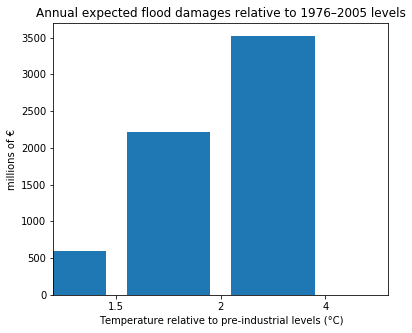

In [22]:
values = np.array(values)

plt.figure(figsize=(6,5))
plt.bar(range(3), values/1000000)  # <-- NOTE THAT I HAVE DIVIDED THE VALUES BY 1,000,000 HERE
plt.xticks([0.5,1.5,2.5], swl_values)
plt.xlim([-0.1, 3.1])
plt.xlabel(fig_labels_json['swl'])
plt.title("Annual expected flood damages relative to 1976–2005 levels")
plt.ylabel('millions of €')
plt.show()

In [23]:
dynamic_metadata = ("These data were produced by the {0} model, "
                    "of the {1}. "
                    "Values are relative to avearges over the 1976–2005 period."
                    "Expexted damages are annual estimated cost of flooding, "
                    "estimated in millions of € (relative to 2010 value)."
                    "".format(' '.join(list(set(models))),' '.join(list(set(institutes))), ))
print(dynamic_metadata)

These data were produced by the EC-EARTH model, of the European Commission - Joint Research Centre. Values are relative to avearges over the 1976–2005 period.Expexted damages are annual estimated cost of flooding, estimated in millions of € (relative to 2010 value).


### River flooding: impact

This figure is essentially the same as the previous, except just chaning some labels and descriptions. The figure now relates to number of people impacted rather than financial cost. 

In [24]:
iso = 'ESP' 

query=("SELECT mean as value, swl_info as swl, variable, institution, model_short_name " 
       "FROM master_admin0 "
       "WHERE variable like 'river_floods_PopAff' "
       "AND iso = '{0}'"
       "AND swl_info < 6"
       "ORDER BY swl"
       "".format(iso))

print(query,'\n')

account = 'helixscope'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": query}
r = requests.get(urlCarto, params=sql)
print(r.url,'\n')

pprint.pprint(r.json())

SELECT mean as value, swl_info as swl, variable, institution, model_short_name FROM master_admin0 WHERE variable like 'river_floods_PopAff' AND iso = 'ESP'AND swl_info < 6ORDER BY swl 

https://helixscope.carto.com/api/v2/sql?q=SELECT+mean+as+value%2C+swl_info+as+swl%2C+variable%2C+institution%2C+model_short_name+FROM+master_admin0+WHERE+variable+like+%27river_floods_PopAff%27+AND+iso+%3D+%27ESP%27AND+swl_info+%3C+6ORDER+BY+swl 

{'fields': {'institution': {'type': 'string'},
            'model_short_name': {'type': 'string'},
            'swl': {'type': 'number'},
            'value': {'type': 'number'},
            'variable': {'type': 'string'}},
 'rows': [{'institution': 'European Commission - Joint Research Centre',
           'model_short_name': 'EC-EARTH',
           'swl': 1.5,
           'value': 36027,
           'variable': 'river_floods_PopAff'},
          {'institution': 'European Commission - Joint Research Centre',
           'model_short_name': 'EC-EARTH',
           's

In [25]:
swl_values = []
values = []
models = []
institutes = []
d = r.json()
for row in d.get('rows'):
    swl_values.append(row.get('swl'))
    values.append(row.get('value'))
    models.append(row.get('model_short_name'))
    institutes.append(row.get('institution'))

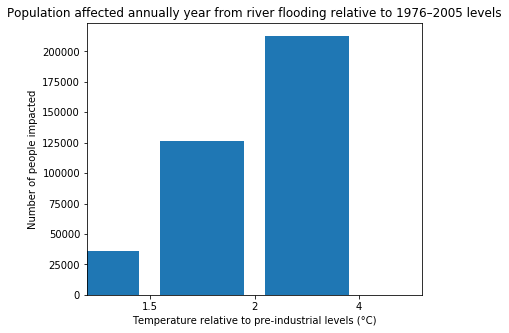

In [26]:
values = np.array(values)

plt.figure(figsize=(6,5))
plt.bar(range(3), values)  # <-- NOTE THAT I HAVE DIVIDED THE VALUES BY 1,000,000 HERE
plt.xticks([0.5,1.5,2.5], swl_values)
plt.xlim([-0.1, 3.1])
plt.xlabel(fig_labels_json['swl'])
plt.title("Population affected annually year from river flooding relative to 1976–2005 levels")
plt.ylabel('Number of people impacted')
plt.show()

In [27]:
dynamic_metadata = ("These data were produced by the {0} model, "
                    "of the {1}. "
                    "Values are relative to avearges over the 1976–2005 period. "
                    "The data show the estimated number of people affected annually by river flooding, "
                    "relative to 1976–2010 values."
                    "".format(' '.join(list(set(models))),' '.join(list(set(institutes))), ))
print(dynamic_metadata)

These data were produced by the EC-EARTH model, of the European Commission - Joint Research Centre. Values are relative to avearges over the 1976–2005 period. The data show the estimated number of people affected annually by river flooding, relative to 1976–2010 values.


## Climatalogical and Ecological Data

We are going to re-use a similar type of boxplot that we made from the map, except in this case we will put 3 next to each other (one for each warming level). We will also add two filters to enable the user to select the `variable` and `attribute` of interest (as there are many possible combinations).

** NOTE **: * You will need to create two filters for this graph, `variable` and `attribute`, as shown below. As, in total, there are 16 variations of this figure that can be produced.*

The possibile for the drop down menu items in `variable` are `['ts','tx','tn', 'pr', 'nbp', 'evap', 'gpp', 'cVeg', 'cSoil','amphibianobiodiversity','amphibiarealbiodiversity','birdnobiodiversity','birdrealbiodiversity','mammalnobiodiversity', 'mammalrealbiodiversity','reptilenobiodiversity','reptilerealbiodiversity']`, while the possible attribute items should be `['max', 'min','mean','std']`. (The attributes are essentially columns of the table.)

Remeber we have a mapping to human readable menu items for both of these items.

The variables cover both climate (`impact_tag = cl`), ecological (`impact_tag = eco`) and biodiversity (`impact_tag = bd`) data. It may be a good idea to make a seperation between these two in the drop-down selector.

E.g. 

* Climate:
     * list the human readable names of `['ts','tx','tn', 'pr']`
* Ecological:
     * list the human readable names of `['nbp', 'evap', 'gpp', 'cVeg', 'cSoil']`
* Biodiveristy:
     * list the human readable names of `['amphibianobiodiversity','amphibiarealbiodiversity','birdnobiodiversity','birdrealbiodiversity','mammalnobiodiversity','mammalrealbiodiversity','reptilenobiodiversity','reptilerealbiodiversity']`
     
     
**Note** We should multiply the biodiversity data by 100. prior to plotting, as currently these data are a fractional percent, however they are described in their metadata as simply as %. I have put a little hack (logic test) in the below code to check if it is one of the biodiversity datasets and multiply if it is. You will need to replicate this on the front-end too!

In [28]:
table_name = 'master_admin0'
var_name = 'tx'      # ['ts','tx','tn', 'pr', 'nbp', 'evap', 'gpp', 'cVeg', 'cSoil', 'amphibianobiodiversity','amphibiarealbiodiversity','birdnobiodiversity','birdrealbiodiversity','mammalnobiodiversity','mammalrealbiodiversity','reptilenobiodiversity','reptilerealbiodiversity']
attribute = 'std'   # ['max', 'min','mean','std']
iso = 'ESP'

query=("SELECT model_short_name, swl_info as swl, run, model_long_name, institution,  {0} as value "
       "FROM {1} "
       "WHERE variable = '{3}'"
       "AND iso = '{4}'"
       "ORDER BY swl"
       "".format(attribute, table_name, swl_var, var_name, iso))

print(query,'\n')

account = 'helixscope'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": query}
r = requests.get(urlCarto, params=sql)
print(r.url,'\n')
pprint.pprint(r.json())

SELECT model_short_name, swl_info as swl, run, model_long_name, institution,  std as value FROM master_admin0 WHERE variable = 'tx'AND iso = 'ESP'ORDER BY swl 

https://helixscope.carto.com/api/v2/sql?q=SELECT+model_short_name%2C+swl_info+as+swl%2C+run%2C+model_long_name%2C+institution%2C++std+as+value+FROM+master_admin0+WHERE+variable+%3D+%27tx%27AND+iso+%3D+%27ESP%27ORDER+BY+swl 

{'fields': {'institution': {'type': 'string'},
            'model_long_name': {'type': 'string'},
            'model_short_name': {'type': 'string'},
            'run': {'type': 'number'},
            'swl': {'type': 'number'},
            'value': {'type': 'number'}},
 'rows': [{'institution': 'Tyndall Centre for Climate Change Research, '
                          'University of East Anglia',
           'model_long_name': 'ECEARTH-R6',
           'model_short_name': 'ECEARTH',
           'run': 6,
           'swl': 1.5,
           'value': 3.56},
          {'institution': 'Tyndall Centre for Climate Chang

           'run': 6,
           'swl': 2,
           'value': 2.78},
          {'institution': 'Tyndall Centre for Climate Change Research, '
                          'University of East Anglia',
           'model_long_name': 'ECEARTH-R5',
           'model_short_name': 'ECEARTH',
           'run': 5,
           'swl': 2,
           'value': 2.67},
          {'institution': 'Tyndall Centre for Climate Change Research, '
                          'University of East Anglia',
           'model_long_name': 'HADGEM3-R8',
           'model_short_name': 'HADGEM3',
           'run': 8,
           'swl': 2,
           'value': 3.49},
          {'institution': 'Tyndall Centre for Climate Change Research, '
                          'University of East Anglia',
           'model_long_name': 'HADGEM3-R3',
           'model_short_name': 'HADGEM3',
           'run': 3,
           'swl': 2,
           'value': 2.67},
          {'institution': 'Tyndall Centre for Climate Change Research, '
         

           'model_long_name': 'ECEARTH-R5',
           'model_short_name': 'ECEARTH',
           'run': 5,
           'swl': 4,
           'value': 3.81},
          {'institution': 'Tyndall Centre for Climate Change Research, '
                          'University of East Anglia',
           'model_long_name': 'ECEARTH-R4',
           'model_short_name': 'ECEARTH',
           'run': 4,
           'swl': 4,
           'value': 3.9},
          {'institution': 'Tyndall Centre for Climate Change Research, '
                          'University of East Anglia',
           'model_long_name': 'ECEARTH-R3',
           'model_short_name': 'ECEARTH',
           'run': 3,
           'swl': 4,
           'value': 3.27},
          {'institution': 'Tyndall Centre for Climate Change Research, '
                          'University of East Anglia',
           'model_long_name': 'ECEARTH-R4',
           'model_short_name': 'ECEARTH',
           'run': 4,
           'swl': 4,
           'value': 2.74

In [32]:
tmp_categories = []
tmp_institutes = []
for swl in [1.5, 2, 4]:
    tmp_categories.append(d_by_swl[swl]['categories'])
    tmp_institutes.append(d_by_swl[swl]['institutions'])

dynamic_sentence = ("{0} of {1} over the country-wide area: "
                    "{2} "
                    "These data are obtained from {3} models, processed by {4}."
                    "".format( attribute_jsons[attribute].title(),
                               short_name_json[var_name].lower(),
                               long_name_json[var_name],
                                ', '.join(list(set(list(chain.from_iterable(tmp_categories))))),
                                ', '.join(list(set(list(chain.from_iterable(tmp_institutes))) ))
                            )
                    )

#print(dynamic_sentence)

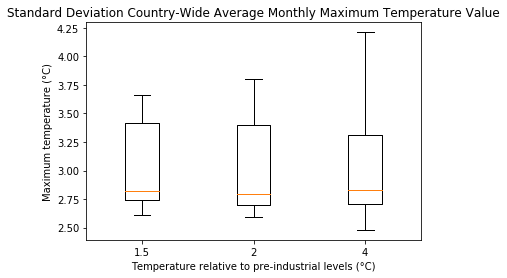

Each point represents a model run. Together, they represent the range of possible futures for the minimum of average monthly temperature in the area you have selected, in a world which has experienced 2°C warming relative to pre-industrial levels. The map shows the average values of the model projections (28.76 °C).


In [31]:
# Example of constructing the multi-boxplot (which you can re-factor to your language / library of choice)
d = r.json()

biodiversity_list_for_hack = ['amphibianobiodiversity','amphibiarealbiodiversity','birdnobiodiversity','birdrealbiodiversity','mammalnobiodiversity','mammalrealbiodiversity','reptilenobiodiversity','reptilerealbiodiversity']

d_by_swl = {}
for swl in [1.5, 2, 4]:
    data = []
    individual_point_labels = []
    categories = []
    institutions = []
    for row in d.get('rows'):
        if row.get('swl') == swl:
            if var_name in biodiversity_list_for_hack:
                data.append(row.get('value', None) * 100.)
            else:
                data.append(row.get('value', None))                
            individual_point_labels.append(row.get('model_long_name'))
            categories.append(row.get('model_short_name'))
            institutions.append(row.get('institution'))
    d_by_swl[swl] = {'categories': categories,
                     'institutions':institutions,
                     'individual_point_labels':individual_point_labels,
                     'data': data,
                    }


dynamic_title = "{1} country-wide {0} value".format(short_name_json[var_name],
                                                    attribute_jsons[attribute]).title()
    
    
# --- PLOTING DEMO ----
data = [np.array(d_by_swl[1.5]['data']), np.array(d_by_swl[2]['data']), np.array(d_by_swl[4]['data'])]
plt.boxplot(data, 0, '', 1 )
plt.xticks([1, 2, 3],['1.5', '2', '4'])
plt.title(dynamic_title)
plt.ylabel(fig_labels_json[var_name])
plt.xlabel(fig_labels_json['swl'])
plt.show()
print(dynamic_sentence)  # <-- this should be revealed via a more info on click interface

### Summary plots

Each of the Variables should have a summary graph also, made up of the average of their `mean` values in each SWL catagory. There should be a line for each of the min, mean, and max. and following the topic colour scheme.

In [34]:
# tx - temp max, ts - temp avg, tn - temp min

query=("SELECT AVG(mean), swl_info, variable "
        "FROM master_admin0 "
        "where variable in ('tx', 'ts','tn') "
       " AND iso = 'ESP'"
       " AND swl_info < 6"
       " GROUP BY swl_info, variable")

print(query,'\n')

account = 'helixscope'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": query}
r = requests.get(urlCarto, params=sql)
print(r.url,'\n')
pprint.pprint(r.json())

SELECT AVG(mean), swl_info, variable FROM master_admin0 where variable in ('tx', 'ts','tn')  AND iso = 'ESP' AND swl_info < 6 GROUP BY swl_info, variable 

https://helixscope.carto.com/api/v2/sql?q=SELECT+AVG%28mean%29%2C+swl_info%2C+variable+FROM+master_admin0+where+variable+in+%28%27tx%27%2C+%27ts%27%2C%27tn%27%29++AND+iso+%3D+%27ESP%27+AND+swl_info+%3C+6+GROUP+BY+swl_info%2C+variable 

{'fields': {'avg': {'type': 'number'},
            'swl_info': {'type': 'number'},
            'variable': {'type': 'string'}},
 'rows': [{'avg': 18.587, 'swl_info': 4, 'variable': 'ts'},
          {'avg': 16.2263636363636, 'swl_info': 2, 'variable': 'ts'},
          {'avg': 12.7366, 'swl_info': 4, 'variable': 'tn'},
          {'avg': 10.5641818181818, 'swl_info': 2, 'variable': 'tn'},
          {'avg': 15.6566666666667, 'swl_info': 1.5, 'variable': 'ts'},
          {'avg': 10.0043636363636, 'swl_info': 1.5, 'variable': 'tn'},
          {'avg': 23.8432, 'swl_info': 4, 'variable': 'tx'},
          {'av

In [40]:
min_line = []
mean_line = []
max_line = []

for swl in [1.5, 2, 4]:
    for row in r.json().get('rows'):
        row_swl = row.get('swl_info')
        row_var = row.get('variable')
        if swl == row_swl:
            if row_var == 'tn': min_line.append(row.get('avg'))
            if row_var == 'tx': max_line.append(row.get('avg'))
            if row_var == 'ts': mean_line.append(row.get('avg'))

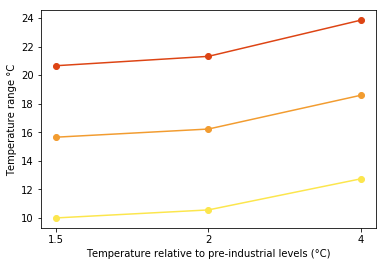

In [58]:
# --- PLOTING DEMO ----

plt.plot(min_line,'o-', color='#FCE64D')
plt.plot(mean_line, 'o-',color='#F29C30')
plt.plot(max_line,'o-' ,color='#DD4414')
plt.xticks([0, 1, 2],['1.5', '2', '4'])
plt.ylabel('Temperature range °C')
plt.xlabel(fig_labels_json['swl'])
plt.show()

### Example of summary plot

![](./pics/summary1.png)

### More examples of boxplot outputs for comparison:


![](./pics/mean_temp.png)

![](./pics/mean_mammal.png)

![](./pics/min_mammal.png)

![](./pics/mean_precip.png)



```
SELECT swl, variable,
      PERCENTILE_CONT(0.25) WITHIN GROUP(ORDER BY min) AS min_q1,
      PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY min) AS min_median,
      PERCENTILE_CONT(0.75) WITHIN GROUP(ORDER BY min) AS min_q3,
      MAX(min) AS min_maximum,
      MIN(min) AS min_minimum,
      ARRAY_AGG(min ORDER BY min ASC) AS min_values,
      PERCENTILE_CONT(0.25) WITHIN GROUP(ORDER BY max) AS max_q1,
      PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY max) AS max_median,
      PERCENTILE_CONT(0.75) WITHIN GROUP(ORDER BY max) AS max_q3,
      MAX(max) AS max_maximum,
      MIN(max) AS max_minimum,
      ARRAY_AGG(max ORDER BY max ASC) AS max_values,
      PERCENTILE_CONT(0.25) WITHIN GROUP(ORDER BY mean) AS mean_q1,
      PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY mean) AS mean_median,
      PERCENTILE_CONT(0.75) WITHIN GROUP(ORDER BY mean) AS mean_q3,
      MAX(mean) AS mean_maximum,
      MIN(mean) AS mean_minimum,
      ARRAY_AGG(mean ORDER BY mean ASC) AS mean_values,     
      PERCENTILE_CONT(0.25) WITHIN GROUP(ORDER BY std) AS std_q1,
      PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY std) AS std_median,
      PERCENTILE_CONT(0.75) WITHIN GROUP(ORDER BY std) AS std_q3,
      MAX(std) AS std_maximum,
      MIN(std) AS std_minimum,
      ARRAY_AGG(std ORDER BY std ASC) AS std_values
    FROM (
      SELECT swl_info AS swl,
             run,
             model_short_name,
             institution,
             variable,
      		 CASE WHEN variable LIKE '%biodiversity' THEN min*100 ELSE min END AS min,
      		 CASE WHEN variable LIKE '%biodiversity' THEN max*100 ELSE max END AS max,
      		 CASE WHEN variable LIKE '%biodiversity' THEN mean*100 ELSE mean END AS mean,
      		 CASE WHEN variable LIKE '%biodiversity' THEN std*100 ELSE std END AS std
      FROM master_admin0
      WHERE iso = 'AFG'
      AND swl_info < 6
      ORDER BY swl
    ) data
    GROUP BY swl, variable
   ```